# TITLE

Performing Logistic regression analysis on given dataset


# NAMES

Names :  Preetam Narendra Soni, Guanyu zhou
Group:   11


# ABSTRACT
Abstract, a brief introduction or explanation and results/conclusion about what this report is for, < ½  page, 10 pts

This report is about performing logistic regression over the given dataset which has a shape of (3921,21) in which we have to predict or classify weather the given email is spam or not using the logistic regression and analyse the result thus we go by analysing the given data set using different Pandas functions and performing model building,analysing summary, predicting over the test data, plotting, finding optimal threshold, ROC curve. 
Thus we find the AUC and judge the efficiency of the model and find the optimal point in ROC curve finally getting threshold.

# THEORY

Theory, <1 page, 20 pts


Regression is relationship between response and predictors. Logistic 
regression is regression with categorical response and one or
multilple numerical and/or categorical predictors
In logistic regression we are quantifying the probability of an event commonly known as odds.
odds(E)=P(E)/P(E_complement)
Logistic regression is just one example of Generalized linear models(GLMs)
GLM have 3 characteristics: 
1. probability distribution describing the outcome variable
2. A linear model: n=b0+b1x1+...
3. a link funciton that relates the linear model to the parameter of the outcome 
distribution: g(p)=n or p=g^-1(n)


Logistic regression uses a GLM to model a binary categorical variable using numerical and categorical predictors.
we assume a binomial distribution produced the outcome variable and we therefore want to model p the probability of sucess for  
a given set of predictors. To finish specifying the logistic model, we just need to estabilish a reasonable link function that connects n to p. There are variety of options but the most commonly used is the logit function.Thus lastly after finding thresho, we have to find the optimal threshold using ROC curve and then using AUC (Area under the curve) as an assesment of the predictive ability of a model.

The logistic regression is a regression with the categorical response and one or multiple numerical and/or categorical predictors. Logistic regression uses a generalized linear model to model a binary categorical variable using numerical and categorical predictors.

Linear regression equation: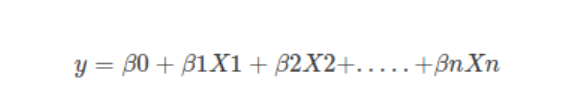
Y is the dependent variable and x1,x2... are independent variables.
we will apply our logit function on the generalized linear model because it takes a value between 0 and 1 and maps it to a value between minus infinite to positive infinite.
The Logit function: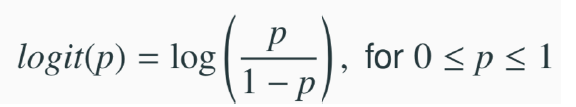,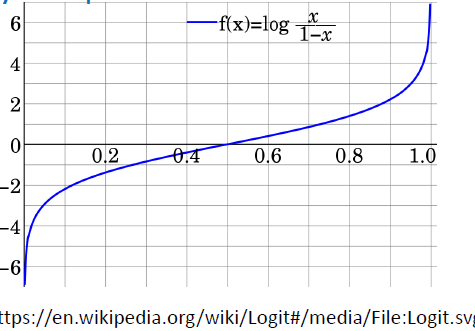
An inverse logit function will take a value between minus infinite to positive infinite and map it between 0 and 1
Inverse logit function: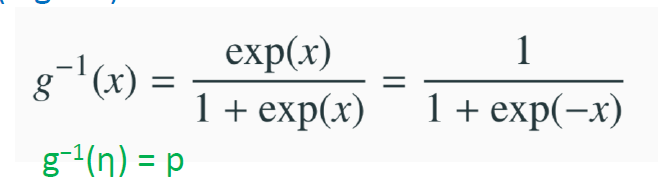,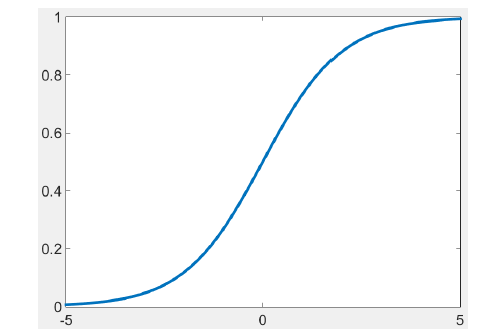

#Exploratory Data Analysis
1. we import important libraries like numpy, pandas, statsmodel.api, matplotlib, seaborn
2. we read the data set using the read funciton 
3. we analyse the data using describe and info()
4. we find null values in the data 
5. we replace the spam column with Yes and No using the replace
6. we use the crostab to find the relation between the 
7. using boxplot we analyse the spam with num_char column, line_breaks
8. we then use the dmatrices from patsy to form the matrix with new X and y 
9. we initialize y as spam and dependent variable
10. we observe y and X shape and columns 
11. we use the sm.Logit over X,y and fit it 
    printing logit result summary 
12. now we use the logit predict over X and save it as y_pred
    Thus we compare the y_pred and df
13. we plot them 
    now we have to find the TP,FP,TN,FN and using the different threshold we store them in list 
14. thus now we find different specivity and sensitivity and now plot first roc curve
    now using FPR, TPR and ROC curve we find AUC thus we grade the efficiency of our model 
 


# conclusion and analysis is at the bottom

Data Preparation

In [61]:
#we are taking a raw look at what data looks like in panda frame
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv(r"C:\Users\Guanyu\Desktop\Zhou-2021Fall-Courses\DSCI-6002-01Intro to data science\HW\Fall ZHOU HOMEWORK\group project2 due1203\DSCI6002_prj2_data.csv")
print(df.shape)
df.head()

#changing spam column to yes and not for use of Dmatrices 
#df_new=df[df['spam']== 1]
df["spam"].replace({0: "No", 1: "Yes"}, inplace=True)
df.head()
df

(3921, 21)


,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,No,0,1,0,0,2011-12-31 22:16:41,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,No,0,1,0,0,2011-12-31 23:03:59,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,No,0,1,0,0,2012-01-01 08:00:32,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
3,No,0,1,0,0,2012-01-01 01:09:49,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
4,No,0,1,0,0,2012-01-01 02:00:01,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,Yes,0,1,0,0,2012-03-30 17:03:45,0,0,0,no,...,0,0,0.332,12,0,0,0,0,0,small
3917,Yes,0,1,0,0,2012-03-31 07:13:19,0,0,1,no,...,0,0,0.323,15,0,0,0,0,0,small
3918,No,1,1,0,0,2012-03-30 09:20:33,0,0,0,no,...,0,0,8.656,208,1,0,0,0,5,small
3919,No,1,1,0,0,2012-03-28 09:00:49,0,0,0,no,...,0,0,10.185,132,0,0,0,0,0,small


In [62]:
#showing frequency of categorical variable
data_crosstab= pd.crosstab(df["spam"],df["number"])
print(data_crosstab)

number  big  none  small
spam                    
No      495   400   2659
Yes      50   149    168


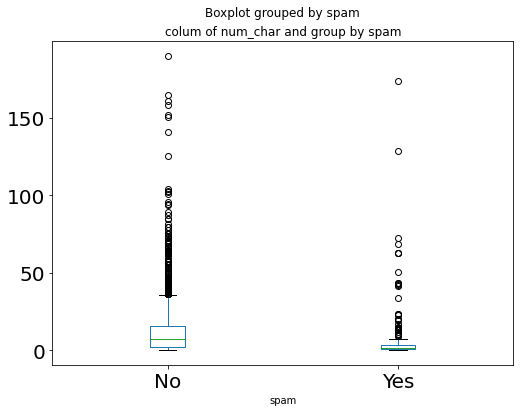

In [63]:
# boxplot to show colum of num_char and group by spam
iamboxplot=df.boxplot(column='num_char',by='spam',grid=False,figsize=(8,6),fontsize=20)
iamboxplotname=iamboxplot.set_title('colum of num_char and group by spam')

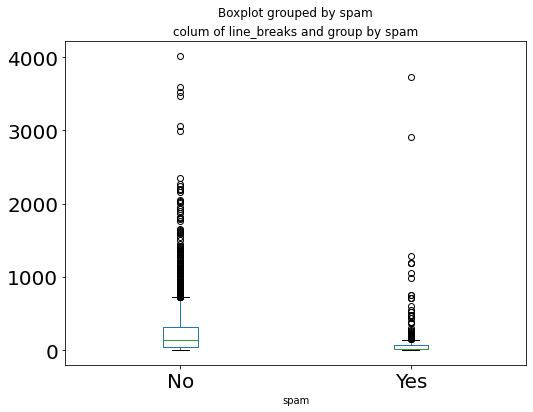

In [64]:
# boxplot to show colum of line_breaks and group by spam
iamboxplot=df.boxplot(column='line_breaks',by='spam',grid=False,figsize=(8,6),fontsize=20)
iamboxplotname=iamboxplot.set_title('colum of line_breaks and group by spam')

Age model

In [97]:
#data preparation
#we are dropping "time" because its time format.
#we are dropping sent_email because its huge standard error and p value = 1
#we are dropping from because it has only value 1
from patsy import dmatrices
y1, X= dmatrices('spam ~ to_multiple + image + attach + dollar+ C(winner) + inherit + password +num_char + line_breaks + format + re_subj  + urgent_subj + exclaim_mess + C(number)   ',df,return_type='dataframe')  # formula:'y ~ x1+x2+x3+x4', and making y value 1 and 0. https://learn-scikit.oneoffcoder.com/patsy.html
#df_new=df[df['spam']== 1]
#y=y[y['spam']==1]
y=y1['spam[Yes]']

In [98]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: spam[Yes], dtype: float64

In [99]:
print(X.shape)
X.head()

(3921, 16)


,Intercept,C(winner)[T.yes],C(number)[T.none],C(number)[T.small],to_multiple,image,attach,dollar,inherit,password,num_char,line_breaks,format,re_subj,urgent_subj,exclaim_mess
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.370,202.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.504,202.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,7.773,192.0,1.0,0.0,0.0,6.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.256,255.0,1.0,0.0,0.0,48.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.231,29.0,0.0,0.0,0.0,1.0


Modeling

In [101]:
#check model, we got n=  0.0854   +  -2.81 * to_multiple - 0.0032 .........
logit_mod=sm.Logit(y,X)
logit_res=logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.229586
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              spam[Yes]   No. Observations:                 3921
Model:                          Logit   Df Residuals:                     3905
Method:                           MLE   Df Model:                           15
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.2613
Time:                        14:09:57   Log-Likelihood:                -900.20
converged:                       True   LL-Null:                       -1218.6
Covariance Type:            nonrobust   LLR p-value:                5.410e-126
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3201      0.198     -1.620      0.105      -0.707       0.067
C(wi

Prediction

In [102]:
#predict result on test data
y_pred=logit_res.predict(X)
print(y_pred.shape)
print(y_pred.head())

(3921,)
0    0.164776
1    0.074282
2    0.075025
3    0.100660
4    0.103675
dtype: float64


Prediction

In [110]:
#prediction and treshold
y_pred=logit_res.predict(X)
print('this is y_pred result',y_pred)

print('this is y_pred shape',y_pred.shape)

this is y_pred result 0       0.164776
1       0.074282
2       0.075025
3       0.100660
4       0.103675
          ...   
3916    0.227485
3917    0.213001
3918    0.004935
3919    0.018711
3920    0.650635
Length: 3921, dtype: float64
this is y_pred shape (3921,)


In [111]:
#making a frame of our prediction comparing original data
df_pred= pd.DataFrame({'Prob':y_pred,'spamstatus':df.spam})
df_pred

,Prob,spamstatus
0,0.164776,No
1,0.074282,No
2,0.075025,No
3,0.100660,No
4,0.103675,No
...,...,...
3916,0.227485,Yes
3917,0.213001,Yes
3918,0.004935,No
3919,0.018711,No


0    0.164776
1    0.074282
2    0.075025
3    0.100660
4    0.103675
dtype: float64
       Prob spamstatus
0  0.164776         No
1  0.074282         No
2  0.075025         No
3  0.100660         No
4  0.103675         No


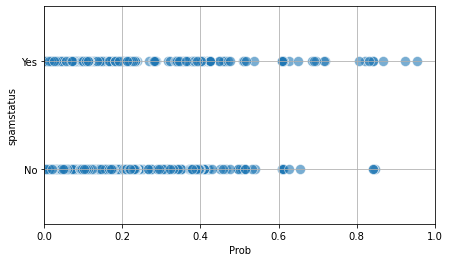

In [112]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df_pred,x='Prob',y='spamstatus',alpha=0.6,s=100);
plt.ylim([-.5,1.5]);
plt.xlim([0,1]);
plt.grid()

print(y_pred.head())
print(df_pred.head())

Threshold

In [75]:
# our threshold
threshold=0.75

TP= df_pred[(df_pred.spamstatus=='Yes') & (df_pred.Prob >= threshold )].count() [0] 
FN= df_pred[(df_pred.spamstatus=='Yes') & (df_pred.Prob < threshold )].count() [0] 
FP= df_pred[(df_pred.spamstatus=='No') & (df_pred.Prob >= threshold )].count() [0] 
TN= df_pred[(df_pred.spamstatus=='No') & (df_pred.Prob < threshold )].count() [0] 
print(f'TP:{TP},FN:{FN},FP:{FP},TN:{TN}')

senstivity=TP/(TP+FN)
specificity=TN/(FP+TN)
print(f"sensitivity:{senstivity},Specificity:{specificity}")

print(df_pred[(df_pred.spamstatus=='Yes') & (df_pred.Prob >= threshold )])

print(df_pred[(df_pred.spamstatus=='No') & (df_pred.Prob >= threshold )])

TP:8,FN:359,FP:3,TN:3551
sensitivity:0.021798365122615803,Specificity:0.9991558806978053
          Prob spamstatus
1416  0.820750        Yes
1427  0.842451        Yes
2544  0.923605        Yes
2583  0.806029        Yes
2612  0.842673        Yes
2627  0.832557        Yes
3893  0.866415        Yes
3897  0.953239        Yes
          Prob spamstatus
457   0.847112         No
489   0.842698         No
1460  0.841229         No


In [113]:
#TPR=TP/(TP + FN)
TPR1=[]
FPR2=[]

a=np.linspace(0,1,num=100)
for threshold in a:
    TP= df_pred[(df_pred.spamstatus=='Yes') & (df_pred.Prob >= threshold )].count() [0] 
    FN= df_pred[(df_pred.spamstatus=='Yes') & (df_pred.Prob < threshold )].count() [0] 
    FP= df_pred[(df_pred.spamstatus=='No') & (df_pred.Prob >= threshold )].count() [0] 
    TN= df_pred[(df_pred.spamstatus=='No') & (df_pred.Prob < threshold )].count() [0]     
     
    TPR=TP/(TP + FN)
    TPR1.append(TPR)
    FPR=FP/(FP+ TN)
    FPR2.append(FPR)

In [77]:
len(FPR2)
fpr4=np.ones(100)
FPR3=fpr4-FPR2

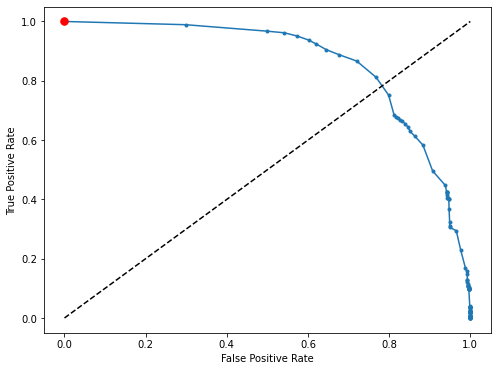

In [132]:
#create ROC curve
plt.figure(figsize=(8,6))
plt.plot(FPR3,TPR1,'.-')
plt.plot([0,1],[0,1],'k--')
plt.plot([0],[1],'r.',markersize=15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [136]:
#our AUC
auc=np.trapz(TPR1,FPR3)
# FPR3=1-FPR2
print("our AUC is:",auc)

#import math
#min_idx = min(math.dist(TPR1,FPR3))
#print('index of min:\t{}\n'
#      'threshold:\t{:2}\n'
#      'fpr:\t\t{:.2}\n'
#      'tpr:\t\t{:.2}'.format(min_idx, threshold[100-min_idx],fpr[min_idx],tpr[min_idx]))

our AUC is: 0.8601541188575179


# ANALYSIS, RESULT AND EXPLANATION:

In the beginning, we were taking a raw look at what data looks like. This email dataset has 3921 rows and 21 features. "numer" and "winner" was its only 2 categorical columns. we determine to let "spam" column be our Y dependent variable because it's binary response while the rest of columns are independent variables. We plot the frequency of our dependent variable to our categorical variable column "numer". The result is showing us that the spam emails are mainly with a small number or no number in them. We made a boxplot to check the data relation between number of characters and spam. It is suggesting us that spam has generally lesser words than non-spam emails. Based on that, we also boxplot the relation between line break and spam in the email. It is also suggesting us that spam has generally lesser words than non-spam emails. After we conducted our logistic regression, we realized there were a few columns need to be taken out. "time" column is time format data and it has no use of our regression model. "sent_email' and huge standard error and its p-value are equal to one which means its coefficient is close to zero. "from" column have only unique value. we dropped three of them. Rest of independent variables are meaningful to our data. the "urgent_subj" column has the biggest coefficient number. It means for every unit change in "urgent_subj", the log odds of spam mail increase by 3.823. As our model has been made, we are generating predictions based on the model and comparing our data's true value. In order to check our model accuracy, we used AUC(area under the curve) and ROC(receiver operating characteristics) curve. There are important evaluation metrics to check classification model performance.AUC is between 0 and 1. The higher the AUC the better the model at predicting. We have obtained AUC with 0.85. It means it has an 85 percent chance that the model will be able to distinguish between positive class and negative class.



# Conclusion

The purpose of this analysis was to estimate a model to determine the factors which influence email is spam or not. For the given dataset, we final the optimal independent variables in the data and conduct logistic regression. we used the ROC curve and AOC to check our model accuracy and they are supporting that our model is able to distinguish between positive class and negative class at 85 percent chance.

# thank you 